In [1]:
from QuantiusResult import importAnnotations
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

from sklearn.cluster import AffinityPropagation
from sklearn import metrics

from itertools import cycle

In [2]:
anno = importAnnotations('cy5contrasted.json')

In [3]:
def clusterAnnotations(image_filename, annotations, pref):
    coords = annotations.loc[annotations['image_filename'] == image_filename, ['x', 'y']].as_matrix()

    af = AffinityPropagation(preference=pref).fit(coords)
    cluster_centers_indices = af.cluster_centers_indices_
    labels = af.labels_

    n_clusters_ = len(cluster_centers_indices)
    
    return [cluster_centers_indices, labels, n_clusters_]

def plotAnnotations(image_filename, annotations, cluster_centers_indices, labels, n_clusters, min_annotations):
    
    coords = annotations.loc[annotations['image_filename'] == image_filename, ['x', 'y']].as_matrix()
    
    im_height = annotations.loc[annotations['image_filename'] == image_filename, 'height'].unique()[0]
    
    fig=plt.figure(figsize=(18, 16), dpi= 80)

    img = mpimg.imread('./Crops/' + image_filename)
    imgplot = plt.imshow(img)

    colors = cycle('bgrcmybgrcmybgrcmybgrcmy')
    
    for k, col in zip(range(n_clusters), colors):
        class_members = labels == k
    
        if sum(class_members) < min_annotations:
            col = 'k'
    
        cluster_center = coords[cluster_centers_indices[k]]
        #plt.plot(coords[class_members, 0], im_height - coords[class_members, 1], col + '.')
        plt.scatter(cluster_center[0], im_height - cluster_center[1], facecolors='none', edgecolor = col, s = 150)
        #for x in coords[class_members]:
        #    plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

    plt.title('Estimated number of clusters: %d' % n_clusters)
    plt.show()


cy5contrasted_100pxroi.png


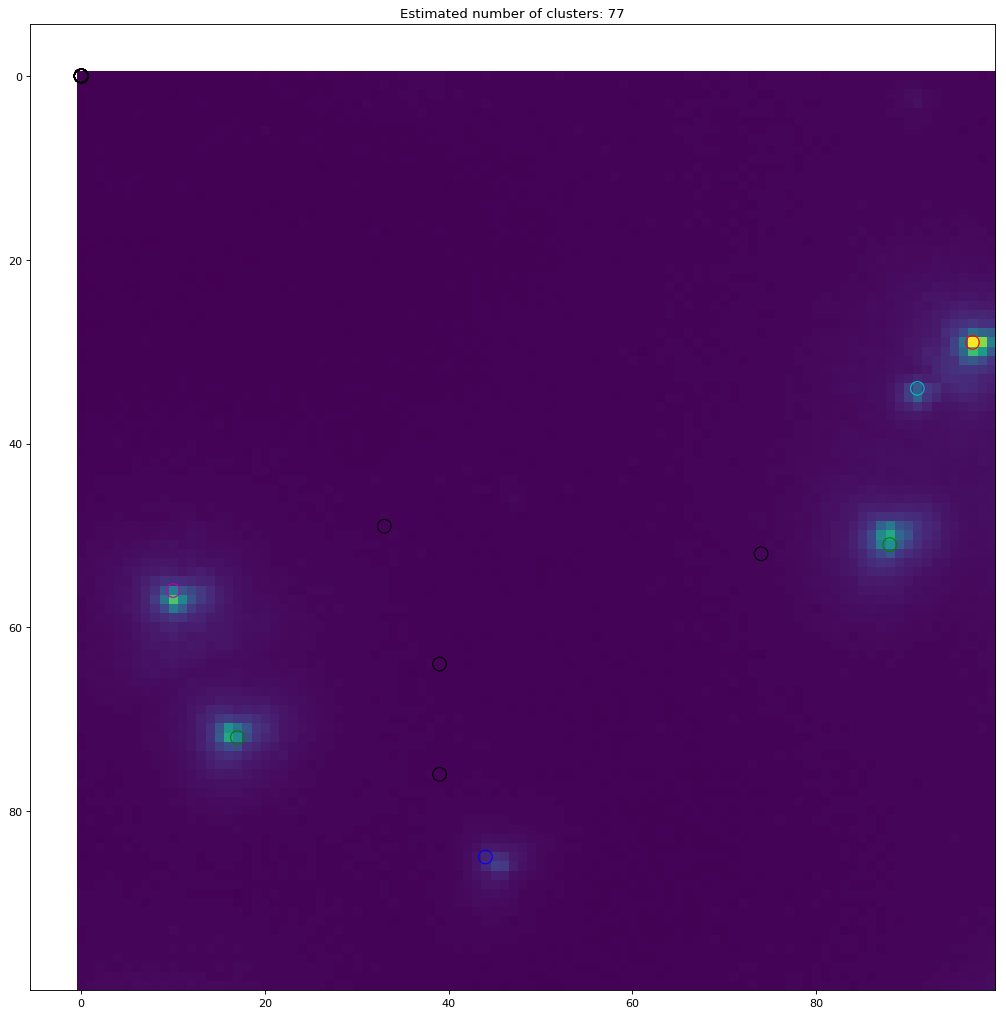

cy5contrasted_250pxroi.png


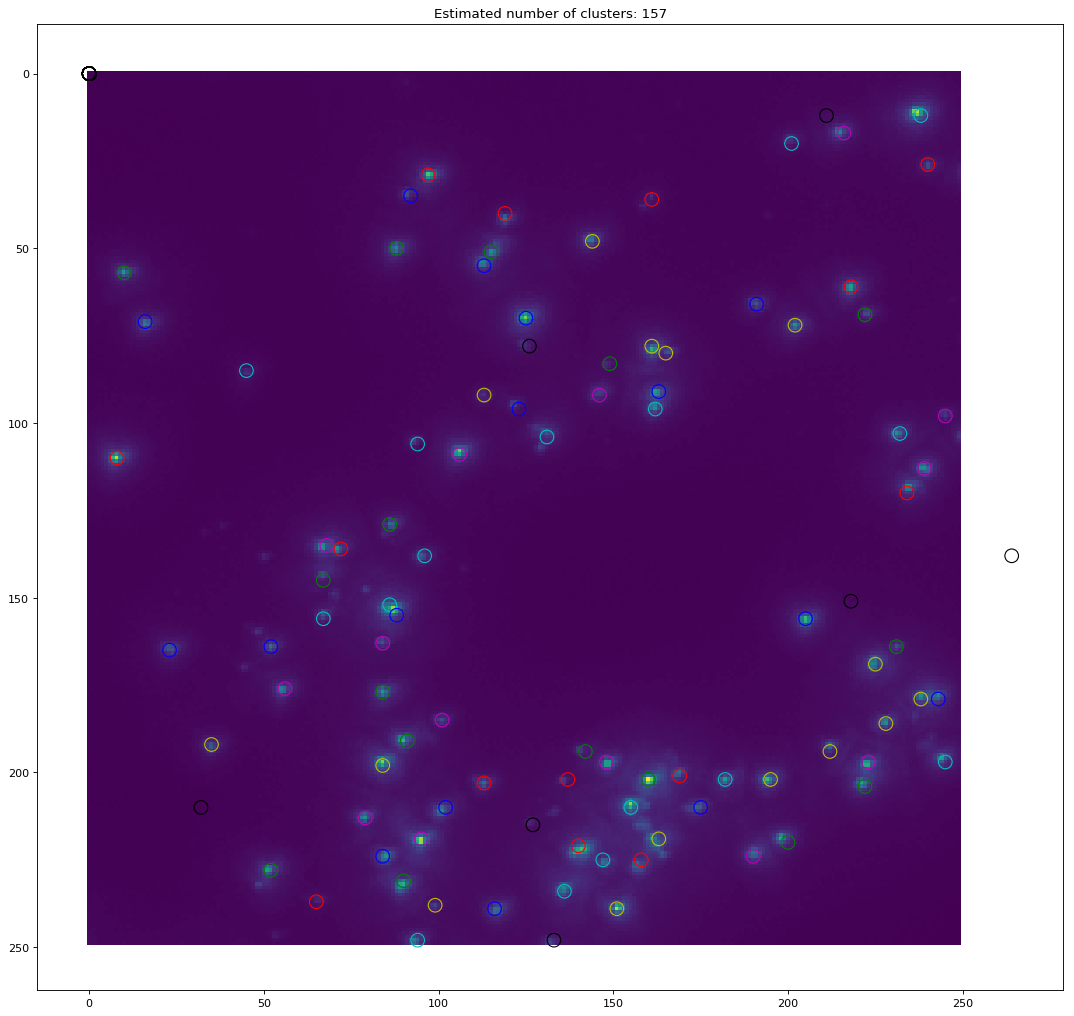

cy5contrasted_150pxroi.png


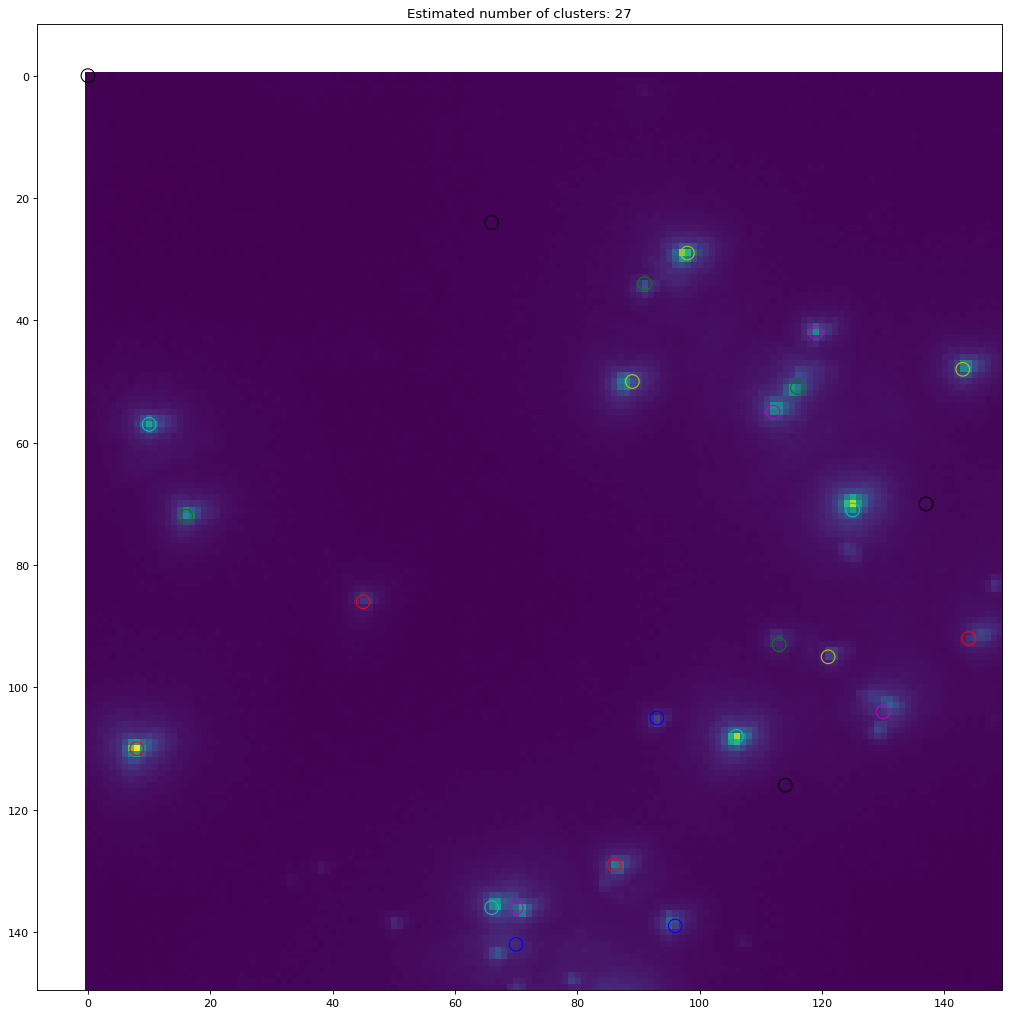

cy5contrasted_200pxroi.png


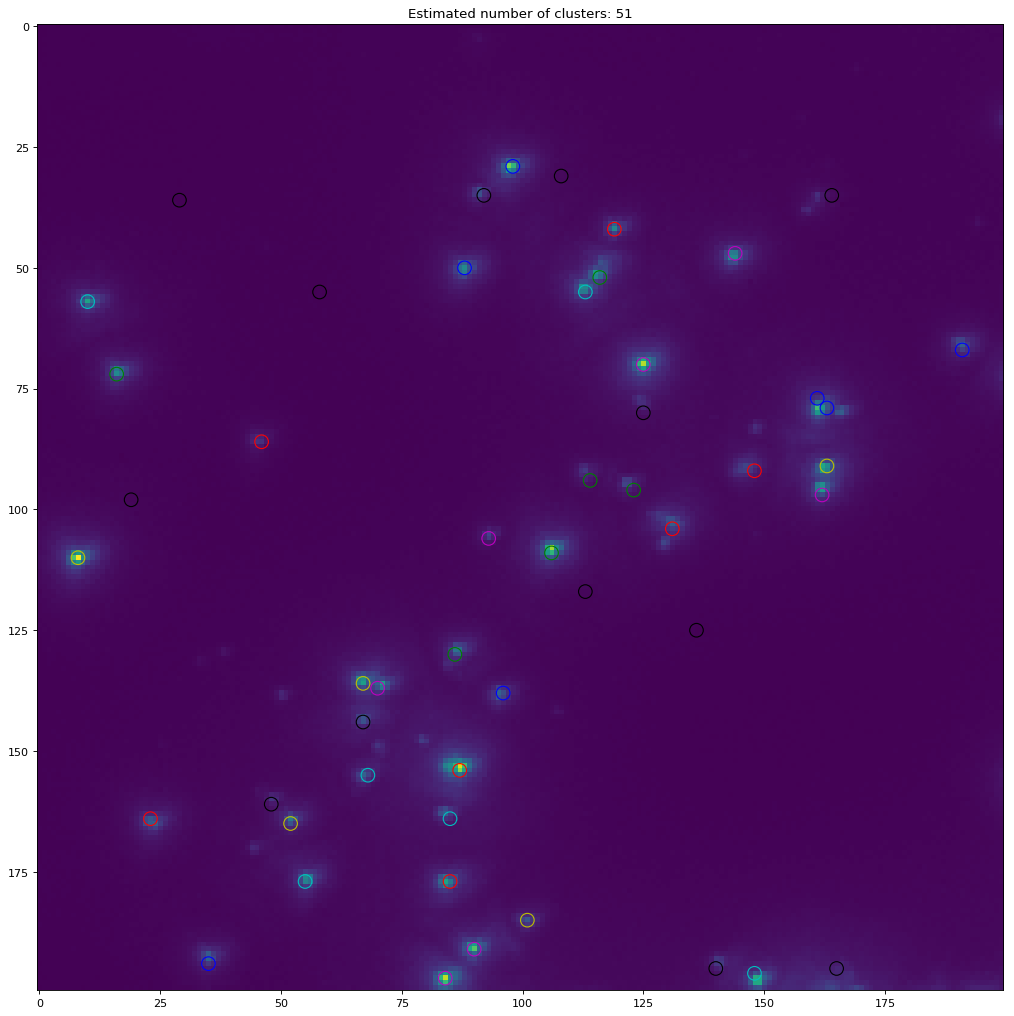

cy5contrasted_300pxroi.png


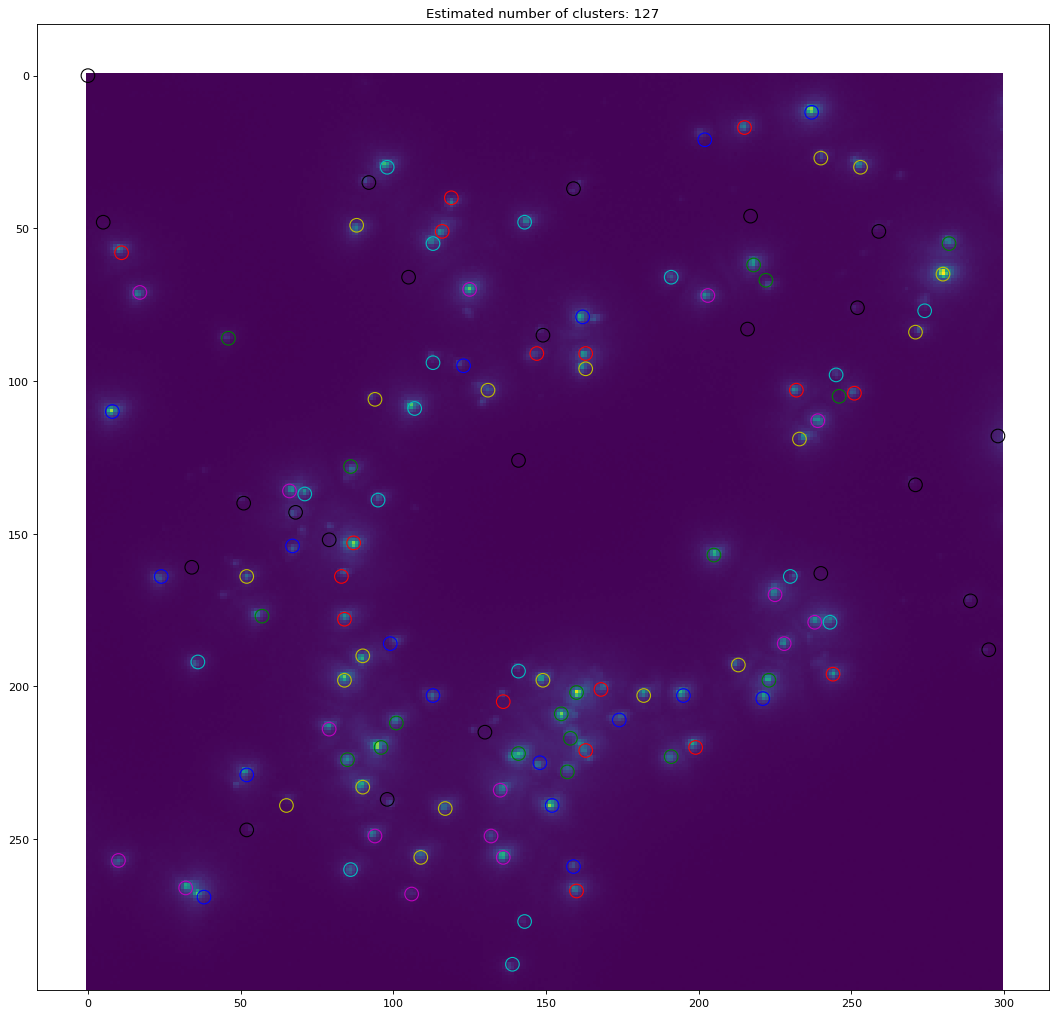

In [4]:
filenames = anno['image_filename'].unique()

for im in filenames:
    [cluster_center_indices, labels, n_clusters] = clusterAnnotations(im, anno, -100)
    print(im)
    plotAnnotations(im, anno, cluster_center_indices, labels, n_clusters, 5)

In [ ]:
anno.head